In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [3]:
rob1 = Image.open(r'D:\Users\Miguel\Documents\TCC_faces\Primera\ImgPrueba\1 (1).jpeg')
# rob2 = Image.open('robert2.jpg')
# chris = Image.open('chris.jpg')

(-0.5, 1065.5, 1599.5, -0.5)

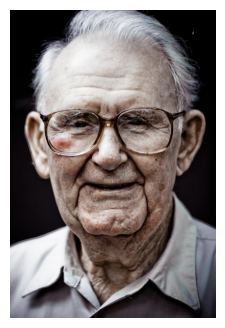

In [4]:
plt.figure(figsize=(5, 4))
plt.imshow(rob1)
plt.axis('off')

In [5]:
import torch
from facenet_pytorch import MTCNN
import numpy as np

# Detectar si se dispone de GPU cuda
# ==============================================================================
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))
mtcnn = MTCNN(
            select_largest = True,
            min_face_size  = 20,
            thresholds     = [0.6, 0.7, 0.7],
            post_process   = False,
            image_size     = 160,
            device         = device
        )

Running on device: cpu


In [6]:
boxes, probs, landmarks = mtcnn.detect(rob1, landmarks=True)
print('Bounding boxes:', boxes)
print('Probability:', probs)
print('landmarks:', landmarks)

Bounding boxes: [[135.23361206054688 234.72731018066406 866.1898193359375
  1156.9688720703125]]
Probability: [0.9997125267982483]
landmarks: [[[348.0921630859375 585.174072265625]
  [667.027587890625 585.8363037109375]
  [507.59503173828125 775.260986328125]
  [363.78253173828125 912.1480712890625]
  [658.144775390625 915.6304931640625]]]


(-0.5, 1065.5, 1599.5, -0.5)

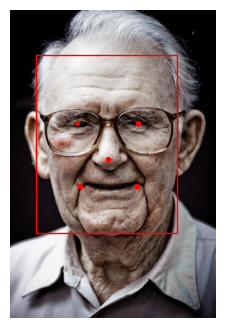

In [7]:
box = boxes[0]
landmark = landmarks[0]
fig, ax  = plt.subplots(figsize=(5, 4))
ax.imshow(rob1)
ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
rect = plt.Rectangle(
            xy     = (box[0], box[1]),
            width  = box[2] - box[0],
            height = box[3] - box[1],
            fill   = False,
            color  = 'red'
       )
ax.add_patch(rect)
ax.axis('off')

In [8]:
imagen_2 =Image.open(r'C:\Users\Eduardo\Downloads\PortableGit\TCC_faces\Primera\Input\malitos.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Eduardo\\Downloads\\PortableGit\\TCC_faces\\Primera\\Input\\malitos.jpg'

(-0.5, 690.5, 481.5, -0.5)

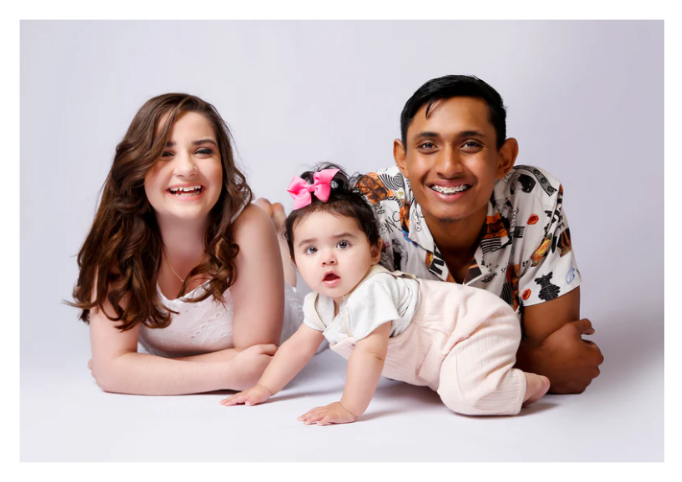

In [13]:
plt.figure(figsize=(10, 6))
plt.imshow(imagen_2)
plt.axis('off')

In [16]:
boxes, probs, landmarks = mtcnn.detect(imagen_2, landmarks=True)

# Representación con matplotlib
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(imagen_2)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
    rect = plt.Rectangle(
                xy     = (box[0], box[1]),
                width  = box[2] - box[0],
                height = box[3] - box[1],
                fill   = False,
                color  = 'red'
           )
    ax.add_patch(rect)
    
ax.axis('off')

RuntimeError: Given groups=1, weight of size [10, 3, 3, 3], expected input[1, 4, 290, 415] to have 3 channels, but got 4 channels instead

(-0.5, 159.5, 159.5, -0.5)

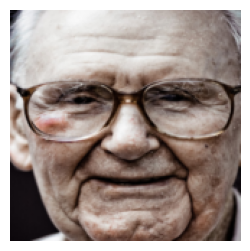

In [10]:
# Detección de cara
# ==============================================================================
face = mtcnn.forward(rob1)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
face = face.permute(1, 2, 0).int().numpy()
ax.imshow(face)
plt.axis('off')

In [11]:
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )
faces = mtcnn.forward(rob1)

In [12]:
round(faces.shape[0] /5)

0

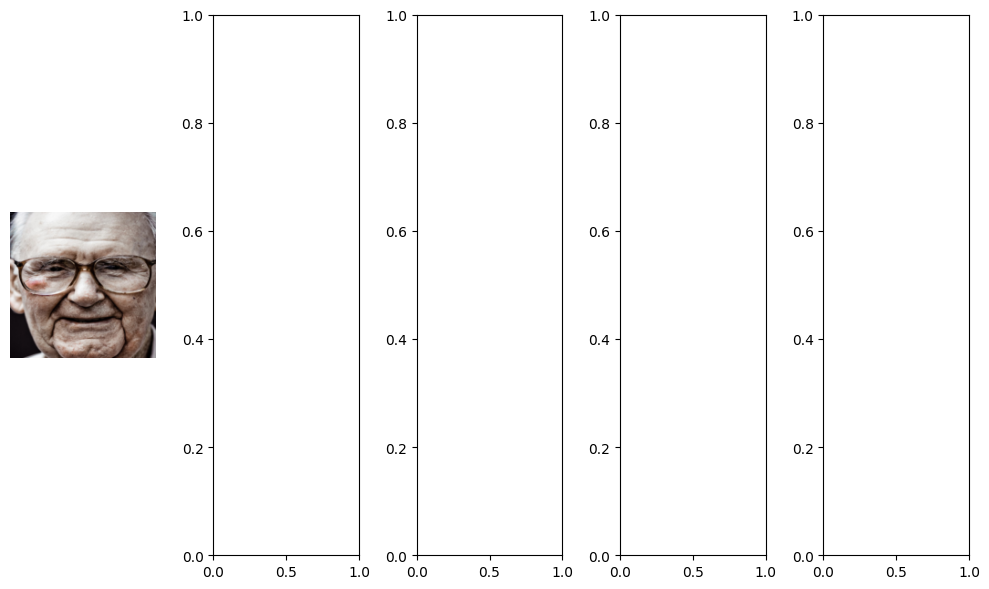

In [13]:
import math
n_caras = faces.shape[0] 

fig, axs = plt.subplots(nrows=math.ceil(n_caras/5), ncols=5, figsize=(10, 6))
axs= axs.flatten()

for i in range(faces.shape[0]):
    face = faces[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')
    
plt.tight_layout()

In [14]:
from facenet_pytorch import InceptionResnetV1
encoder = InceptionResnetV1(pretrained='vggface2', classify=False, device=device).eval()

In [15]:
cara = mtcnn(rob1)
embedding_cara = encoder.forward(cara.reshape((1,3, 160, 160))).detach().cpu()
embedding_cara

tensor([[ 4.8852e-02, -2.1128e-02,  3.7742e-02,  1.0449e-02,  5.0421e-02,
         -6.4126e-02, -5.9226e-03, -7.8442e-03,  5.4793e-04, -3.4103e-02,
         -1.0063e-01, -5.1383e-02, -9.1846e-02, -1.9160e-02,  7.1712e-02,
         -2.6063e-02, -2.9371e-03, -1.6363e-02,  2.1289e-02,  3.6241e-02,
          1.7397e-02,  1.4471e-02, -5.2553e-02, -9.4025e-05,  1.4353e-02,
          1.9967e-04,  8.8587e-02, -6.2827e-03,  3.7201e-02, -9.7277e-02,
         -3.0912e-02,  5.1233e-02,  1.0011e-02,  3.4419e-02,  5.1864e-02,
          2.1552e-02, -4.4366e-02,  3.4474e-02, -3.9644e-02,  3.3487e-02,
          1.3579e-02,  1.0071e-02, -1.0769e-04, -1.0528e-01, -1.2360e-02,
         -4.7840e-02,  2.8908e-02, -2.0240e-02, -4.2233e-02,  2.8399e-02,
          1.0243e-01,  5.8081e-02,  5.0187e-02,  7.1964e-02, -1.8777e-03,
         -5.7924e-02,  4.2163e-02,  6.3884e-02,  2.4534e-02,  1.9331e-02,
         -2.7015e-02, -1.0590e-01,  6.8483e-02, -4.0578e-02,  4.7693e-03,
          3.2039e-02,  4.8444e-02,  2.